In [1]:
# pip install tensorflow
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(r'icml_face_data.csv')

In [3]:
# 1. Explore the data
# Getting the shape of the dataset
print(data.shape)

(35887, 3)


In [4]:
# Display basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [5]:
# Display descriptive statistics
print(data.describe())

            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000


In [6]:
# Display the first few rows of the DataFrame
print(data.head(5))

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
# 2. Handling missing values
# Check for missing values in each column
print(data.isnull().sum())

emotion    0
 Usage     0
 pixels    0
dtype: int64


In [8]:
# 3. Handling duplicate values
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Display the duplicate rows
print("Duplicate Rows except first occurrence:")
print(data[duplicate_rows])

Duplicate Rows except first occurrence:
       emotion        Usage                                             pixels
675          5     Training  255 255 255 255 255 255 255 237 217 146 185 11...
718          2     Training  114 95 82 84 85 120 108 97 83 64 68 85 80 86 1...
1145         5     Training  205 204 205 205 204 203 203 203 202 202 203 20...
1266         3     Training  201 218 246 178 74 62 63 78 85 83 71 65 64 67 ...
1289         5     Training  238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...
...        ...          ...                                                ...
35388        5  PrivateTest  229 229 215 150 150 196 158 144 162 134 142 15...
35489        0  PrivateTest  1 30 98 117 115 86 44 43 65 120 128 99 85 82 7...
35607        0  PrivateTest  214 215 213 210 93 35 43 96 118 118 118 119 11...
35610        4  PrivateTest  133 183 181 194 181 179 207 205 211 194 195 21...
35798        5  PrivateTest  14 16 12 16 17 21 23 23 23 22 22 23 23 23 25 2...

[1234 rows 

In [9]:
# Remove duplicate rows
remove_duplicates = data.drop_duplicates()

# Display the DataFrame without duplicates
print("Data after removing duplicates:")
print(remove_duplicates)

Data after removing duplicates:
       emotion        Usage                                             pixels
0            0     Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0     Training  151 150 147 155 148 133 111 140 170 174 182 15...
2            2     Training  231 212 156 164 174 138 161 173 182 200 106 38...
3            4     Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6     Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...          ...                                                ...
35882        6  PrivateTest  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883        3  PrivateTest  178 174 172 173 181 188 191 194 196 199 200 20...
35884        0  PrivateTest  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885        3  PrivateTest  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886        2  PrivateTest  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...

[34653 rows x 3 col

# PIXELS COLUMN

In [10]:
data[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [11]:
# function to convert pixel values in string format to array format
def stringTOarray_pixel(x):
      return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [12]:
data[' pixels'] = data[' pixels'].apply(lambda x: stringTOarray_pixel(x))

In [13]:
data.head()

,emotion,Usage,pixels
0,0,Training,"[[[70.0], [80.0], [82.0], [72.0], [58.0], [58...."
1,0,Training,"[[[151.0], [150.0], [147.0], [155.0], [148.0],..."
2,2,Training,"[[[231.0], [212.0], [156.0], [164.0], [174.0],..."
3,4,Training,"[[[24.0], [32.0], [36.0], [30.0], [32.0], [23...."
4,6,Training,"[[[4.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


# EMOTION COLUMN

In [14]:
# Exploring the count of emotion 
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

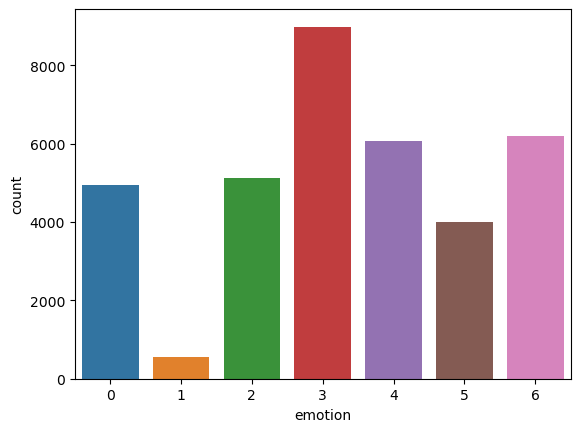

In [15]:
# data emotion column breakdown
sns.countplot(x=data['emotion'])
emotion = ('anger', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

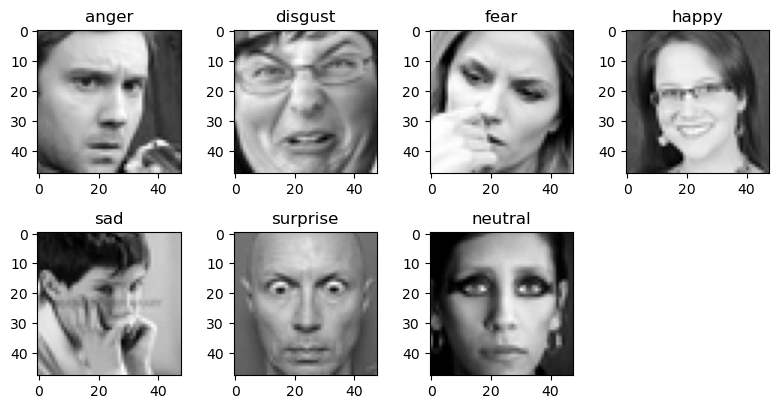

In [16]:
# Visualize images and plot labels
num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
axes = axes.flatten()

emotions = [0, 1, 2, 3, 4, 5, 6]

for i in emotions:
    emotions_data = data[data['emotion'] == i][:1]
    imgage = emotions_data[' pixels'].item()
    imgage = imgage.reshape(48, 48) 
    index = axes[i]
    index.set_title(emotion[i])
    index.imshow(imgage, cmap='gray')

for i in range(len(emotions), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

# IMAGE AUGMENTATION

In [17]:
# Separate data based on 'Usage' column
training_data = data[data[' Usage'] == 'Training']
test_data = data[data[' Usage'] == 'PublicTest']
validation_data = data[data[' Usage'] == 'PrivateTest']

In [18]:
# Define training, validation and test data
#Training Data
X_training = training_data[' pixels']
Y_training = training_data['emotion']

#Test Data
X_test = test_data[' pixels']
Y_test = test_data['emotion']

#Validation Data
X_validation = validation_data[' pixels']
Y_validation = validation_data['emotion'] 

In [19]:
print("Training Shape", np.shape(training_data))
print("Test Shape", np.shape(test_data))
print("Validation Shape", np.shape(validation_data))

Training Shape (28709, 3)
Test Shape (3589, 3)
Validation Shape (3589, 3)


In [20]:
# Reshape and scale the images
X_training = np.stack(X_training, axis = 0)
X_training = X_training.reshape(28709 , 48, 48, 1)

X_test = np.stack(X_test, axis = 0)
X_test = X_test.reshape(3589 , 48, 48, 1)

X_validation = np.stack(X_validation, axis = 0)
X_validation = X_validation.reshape(3589 , 48, 48, 1)

In [21]:
print(X_training.shape, Y_training.shape)
print(X_test.shape, Y_test.shape)
print(X_validation.shape, Y_validation.shape)

(28709, 48, 48, 1) (28709,)
(3589, 48, 48, 1) (3589,)
(3589, 48, 48, 1) (3589,)


In [22]:
# image pre-processing
X_training = X_training/255
X_Test = X_test/255
X_validation = X_validation /255

# CNN model

In [23]:
#defining model
#model=Sequential()
model = Sequential([
    #adding convolution layer
    #model.add(Conv2D(32,(3,3),activation=’relu’,input_shape=(28,28,1)))
    Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (48,48,1)),
    Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
    #adding pooling layer
    #model.add(MaxPool2D(2,2))
    MaxPool2D(2,2),
    Dropout(0.25),
    
    
    #adding fully connected layer
    #model.add(Flatten())
    #model.add(Dense(100,activation=’relu’))
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    
    #adding output layer
    #model.add(Dense(10,activation=’softmax’))
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                        

In [24]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [48]:
#fitting the model
history = model.fit(X_training,Y_training,epochs=10)

Epoch 1/10
898/898 [==============================] - 99s 110ms/step - loss: 0.7385 - accuracy: 0.7255
Epoch 2/10
898/898 [==============================] - 92s 103ms/step - loss: 0.7329 - accuracy: 0.7287
Epoch 3/10
898/898 [==============================] - 92s 103ms/step - loss: 0.7030 - accuracy: 0.7416
Epoch 4/10
898/898 [==============================] - 96s 107ms/step - loss: 0.6916 - accuracy: 0.7460
Epoch 5/10
898/898 [==============================] - 95s 106ms/step - loss: 0.6814 - accuracy: 0.7465
Epoch 6/10
898/898 [==============================] - 100s 111ms/step - loss: 0.6717 - accuracy: 0.7531
Epoch 7/10
898/898 [==============================] - 94s 105ms/step - loss: 0.6591 - accuracy: 0.7544
Epoch 8/10
898/898 [==============================] - 92s 103ms/step - loss: 0.6382 - accuracy: 0.7660
Epoch 9/10
898/898 [==============================] - 92s 102ms/step - loss: 0.6438 - accuracy: 0.7638
Epoch 10/10
898/898 [==============================] - 89s 99ms/step - l

In [49]:
#evaluting the model
loss,acc = model.evaluate(X_test,Y_test)
print('accuracy of CNN model:', acc)

113/113 [==============================] - 2s 16ms/step - loss: 221.6293 - accuracy: 0.3305
accuracy of CNN model: 0.33045417070388794


# Output

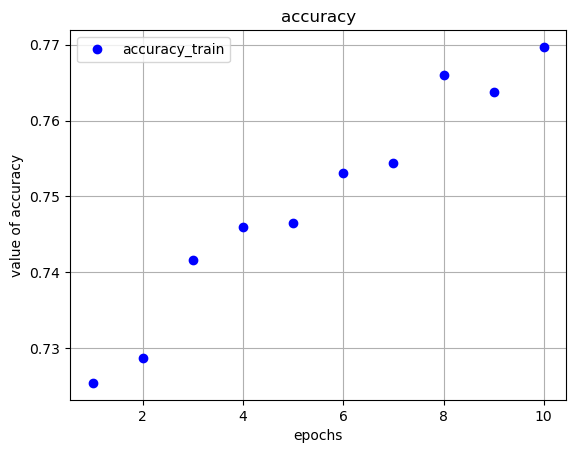

In [53]:
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

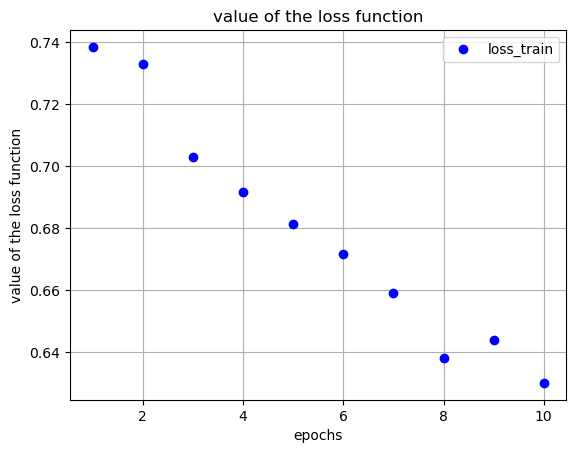

In [52]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()